# **Project Name**    -  Regional Sales Analysis

## ❓ **Problem Statement**  
A retail company operates across multiple regions and wants to understand how its products are performing across different cities, states, and sales channels. The company has collected detailed sales data, including product names, order quantities, revenue, costs, and customer location. However, due to the volume and complexity of the data, it is difficult to derive actionable insights without proper analysis.

## 🎯 **Objective**
The goal of this project is to perform a comprehensive sales analysis using Python. This includes:

Identifying top-performing products and cities by revenue.

Analyzing sales trends over time.

Evaluating revenue contribution across various sales channels.

Calculating profit, total cost, and profit margin.

Visualizing insights using charts like bar plots, line charts  etc.

In [55]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt
import  seaborn   as sns 

In [8]:
# Load all sheets into a dictionary
df_sheet = pd.read_excel("C:\\Users\\Ibrah\\Downloads\\Regional Sales Dataset.xlsx", sheet_name=None)

In [9]:
# Assign individual DataFrames
df_sales       = df_sheet['Sales Orders']
df_customers   = df_sheet['Customers']
df_products    = df_sheet['Products']
df_regions     = df_sheet['Regions']
df_state_reg   = df_sheet['State Regions']
df_budgets     = df_sheet['2017 Budgets']  

In [10]:
print(f"df_sales      shape: {df_sales.shape}      # Sales Orders")
print(f"df_customers  shape: {df_customers.shape}  # Customers")
print(f"df_products   shape: {df_products.shape}   # Products")
print(f"df_regions    shape: {df_regions.shape}    # Regions")
print(f"df_state_reg  shape: {df_state_reg.shape}  # State Regions")
print(f"df_budgets    shape: {df_budgets.shape}    # 2017 Budgets")

df_sales      shape: (64104, 12)      # Sales Orders
df_customers  shape: (175, 2)  # Customers
df_products   shape: (30, 2)   # Products
df_regions    shape: (994, 15)    # Regions
df_state_reg  shape: (49, 3)  # State Regions
df_budgets    shape: (30, 2)    # 2017 Budgets


In [11]:
 # — QUICK VIEW OF ALL RAW DATAFRAMES
# -----------------------------------------
# Print first few rows for each sheet

print("\n— df_sales head —")
display(df_sales.head())
print()

print("\n— df_customers head —")
display(df_customers.head())
print()

print("\n— df_products head —")
display(df_products.head())
print()

print("\n— df_regions head —")
display(df_regions.head())
print()

print("\n— df_state_reg head —")
display(df_state_reg.head())
print()

print("\n— df_budgets head —")
display(df_budgets.head())


— df_sales head —


,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270




— df_customers head —


,Customer Index,Customer Names
0,1,Geiss Company
1,2,Jaxbean Group
2,3,Ascend Ltd
3,4,Eire Corp
4,5,Blogtags Ltd




— df_products head —


,Index,Product Name
0,1,Product 1
1,2,Product 2
2,3,Product 3
3,4,Product 4
4,5,Product 5




— df_regions head —


,id,name,county,state_code,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,1,Auburn,Lee County,AL,Alabama,City,32.60986,-85.48078,334,62059,21767,38342,152375113,2646161,America/Chicago
1,2,Birmingham,Shelby County/Jefferson County,AL,Alabama,City,33.52744,-86.79905,205,212461,89972,31061,378353942,6591013,America/Chicago
2,3,Decatur,Limestone County/Morgan County,AL,Alabama,City,34.57332,-86.99214,256,55437,22294,41496,141006257,17594716,America/Chicago
3,4,Dothan,Dale County/Houston County/Henry County,AL,Alabama,City,31.23370,-85.40682,334,68567,25913,42426,232166237,835468,America/Chicago
4,5,Hoover,Shelby County/Jefferson County,AL,Alabama,City,33.37695,-86.80558,205,84848,32789,77146,122016784,2553332,America/Chicago




— df_state_reg head —


,Column1,Column2,Column3
0,State Code,State,Region
1,AL,Alabama,South
2,AR,Arkansas,South
3,AZ,Arizona,West
4,CA,California,West




— df_budgets head —


,Product Name,2017 Budgets
0,Product 1,3016489.209
1,Product 2,3050087.565
2,Product 3,2642352.432
3,Product 4,2885560.824
4,Product 5,3925424.542


In [14]:
# The first row of df_state_reg contains the real column names.
new_header        = df_state_reg.iloc[0]      # grab the first row
df_state_reg.columns = new_header             # set columns
df_state_reg = df_state_reg[1:].reset_index(drop=True)  # drop header row and reset

In [15]:
#. DATA WRANGLING & MERGING

# 4.1 Merge with Customers
df = df_sales.merge(
    df_customers,
    how='left',
    left_on='Customer Name Index',
    right_on='Customer Index'
)

# 4.2 Merge with Products
df = df.merge(
    df_products,
    how='left',
    left_on='Product Description Index',
    right_on='Index'
)

# 4.3 Merge with Regions
df = df.merge(
    df_regions,
    how='left',
    left_on='Delivery Region Index',
    right_on='id'
)

# 4.4 Merge with State Regions
df = df.merge(
    df_state_reg[["State Code","Region"]],
    how='left',
    left_on='state_code',
    right_on='State Code'
)

# 4.5 Merge with Budgets
df = df.merge(
    df_budgets,
    how='left',
    on='Product Name'
)

# 4.6 Clean up redundant columns
cols_to_drop = [
    'Customer Index', 'Index', 'id', 'State Code',
    # add any auto-generated cols you don't need
]
df = df.drop(columns=cols_to_drop, errors='ignore')

df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,Region,2017 Budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,South,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,Midwest,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,West,5685138.270
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,Midwest,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,Northeast,1085037.329


In [16]:
# Convert all column names to lowercase for consistency and easier access
df.columns = df.columns.str.lower()

# Display the updated list of column names
df.columns.values

array(['ordernumber', 'orderdate', 'customer name index', 'channel',
       'currency code', 'warehouse code', 'delivery region index',
       'product description index', 'order quantity', 'unit price',
       'line total', 'total unit cost', 'customer names', 'product name',
       'name', 'county', 'state_code', 'state', 'type', 'latitude',
       'longitude', 'area_code', 'population', 'households',
       'median_income', 'land_area', 'water_area', 'time_zone', 'region',
       '2017 budgets'], dtype=object)

In [17]:
df.tail(5)

,ordernumber,orderdate,customer name index,channel,currency code,warehouse code,delivery region index,product description index,order quantity,unit price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,region,2017 budgets
64099,SO - 0007573,2018-02-28,74,Wholesale,USD,AXW291,825,26,12,1815.7,...,-74.82877,445,51326,18095,69878,26311722,253129,America/New York,Northeast,5685138.270
64100,SO - 0007706,2018-02-28,51,Export,USD,NXH382,444,21,6,864.3,...,-88.03424,847,69308,26242,71573,35271964,370235,America/Chicago,Midwest,959899.218
64101,SO - 0007718,2018-02-28,136,Distributor,USD,AXW291,312,13,11,3953.0,...,-80.20644,954,57234,20651,42786,22943340,594611,America/New York,South,3720639.645
64102,SO - 0008084,2018-02-28,158,Distributor,USD,AXW291,737,20,7,3959.7,...,-78.74182,716,87514,38912,48662,76228647,162756,America/New York,Northeast,2067108.120
64103,SO - 0008654,2018-02-28,22,Distributor,USD,AXW291,807,15,8,998.3,...,-122.80371,503,96577,37238,56882,50563936,0,America/Los Angeles,West,3299478.315


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   ordernumber                64104 non-null  object        
 1   orderdate                  64104 non-null  datetime64[ns]
 2   customer name index        64104 non-null  int64         
 3   channel                    64104 non-null  object        
 4   currency code              64104 non-null  object        
 5   warehouse code             64104 non-null  object        
 6   delivery region index      64104 non-null  int64         
 7   product description index  64104 non-null  int64         
 8   order quantity             64104 non-null  int64         
 9   unit price                 64104 non-null  float64       
 10  line total                 64104 non-null  float64       
 11  total unit cost            64104 non-null  float64       
 12  cust

In [19]:
df.columns.values

array(['ordernumber', 'orderdate', 'customer name index', 'channel',
       'currency code', 'warehouse code', 'delivery region index',
       'product description index', 'order quantity', 'unit price',
       'line total', 'total unit cost', 'customer names', 'product name',
       'name', 'county', 'state_code', 'state', 'type', 'latitude',
       'longitude', 'area_code', 'population', 'households',
       'median_income', 'land_area', 'water_area', 'time_zone', 'region',
       '2017 budgets'], dtype=object)

In [20]:
df = df.drop(['currency code' ,'warehouse code' ,'product description index' , 'state_code' ,'type' ,'latitude' ,'longitude' ,'area_code' ,'land_area','water_area','time_zone'], axis=1)


In [24]:
df = df.rename(columns={
    'ordernumber'      : 'order_number',   # snake_case for consistency
    'orderdate'        : 'order_date',     # date of the order
    'customer names'   : 'customer_name',  # customer who placed it
    'product name'     : 'product_name',   # product sold
    'order quantity'   : 'quantity',       # units sold
    'unit price'       : 'unit_price',     # price per unit in USD
    'line total'       : 'revenue',        # revenue for the line item
    'total unit cost'  : 'cost',           # cost for the line item
    'county'           : 'country',        # Name of the country   
    'state'            : 'state_name',     # full state name
    'region'           : 'us_region',      # broader U.S. region
    '2017 budgets'     : 'budget'          # 2017 budget target (float)
})      

In [26]:
print(df.columns.tolist())


['order_number', 'order_date', 'customer name index', 'channel', 'delivery region index', 'quantity', 'unit_price', 'revenue', 'cost', 'customer_name', 'product_name', 'name', 'country', 'state_name', 'population', 'households', 'median_income', 'us_region', 'budget']


In [28]:
df.head()

,order_number,order_date,customer name index,channel,delivery region index,quantity,unit_price,revenue,cost,customer_name,product_name,name,country,state_name,population,households,median_income,us_region,budget
0,SO - 000225,2014-01-01,126,Wholesale,364,6,2499.1,14994.6,1824.343,Rhynoodle Ltd,Product 27,Savannah,Chatham County,Georgia,145674,52798,36466,South,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,488,11,2351.7,25868.7,1269.918,Thoughtmix Ltd,Product 20,Greenwood,Johnson County,Indiana,55586,20975,54176,Midwest,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,155,6,978.2,5869.2,684.740,Amerisourc Corp,Product 26,Pleasanton,Alameda County,California,79510,26020,124759,West,5685138.270
3,SO - 0005614,2014-01-01,42,Export,473,7,2338.3,16368.1,1028.852,Colgate-Pa Group,Product 7,Bloomington,Monroe County,Indiana,84067,30232,30019,Midwest,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,256,8,2291.4,18331.2,1260.270,Deseret Group,Product 8,Manchester,Hartford County,Connecticut,58007,24141,63158,Northeast,1085037.329


In [29]:
df.shape

(64104, 19)

In [30]:
#feature enginnering 

In [31]:
# 1. Calculate total cost for each line item
df['total_cost'] = df['quantity'] * df['cost']

# 2. Calculate profit as revenue minus total_cost
df['profit'] = df['revenue'] - df['total_cost']

# 3. Calculate profit margin as a percentage
df['profit_margin_pct'] = (df['profit'] / df['revenue']) * 100

# 4. Extract full month name from order_date for labeling (e.g., 'January', 'February')
df['order_month_name'] = df['order_date'].dt.month_name()

# 5. Extract month number from order_date for correct sorting (1–12)
df['order_month_num'] = df['order_date'].dt.month

# 6. (Optional) Display the updated DataFrame
df.head(5)

,order_number,order_date,customer name index,channel,delivery region index,quantity,unit_price,revenue,cost,customer_name,...,population,households,median_income,us_region,budget,total_cost,profit,profit_margin_pct,order_month_name,order_month_num
0,SO - 000225,2014-01-01,126,Wholesale,364,6,2499.1,14994.6,1824.343,Rhynoodle Ltd,...,145674,52798,36466,South,964940.231,10946.058,4048.542,27.0,January,1
1,SO - 0003378,2014-01-01,96,Distributor,488,11,2351.7,25868.7,1269.918,Thoughtmix Ltd,...,55586,20975,54176,Midwest,2067108.120,13969.098,11899.602,46.0,January,1
2,SO - 0005126,2014-01-01,8,Wholesale,155,6,978.2,5869.2,684.740,Amerisourc Corp,...,79510,26020,124759,West,5685138.270,4108.440,1760.760,30.0,January,1
3,SO - 0005614,2014-01-01,42,Export,473,7,2338.3,16368.1,1028.852,Colgate-Pa Group,...,84067,30232,30019,Midwest,889737.555,7201.964,9166.136,56.0,January,1
4,SO - 0005781,2014-01-01,73,Wholesale,256,8,2291.4,18331.2,1260.270,Deseret Group,...,58007,24141,63158,Northeast,1085037.329,10082.160,8249.040,45.0,January,1


In [32]:
#Data visualization

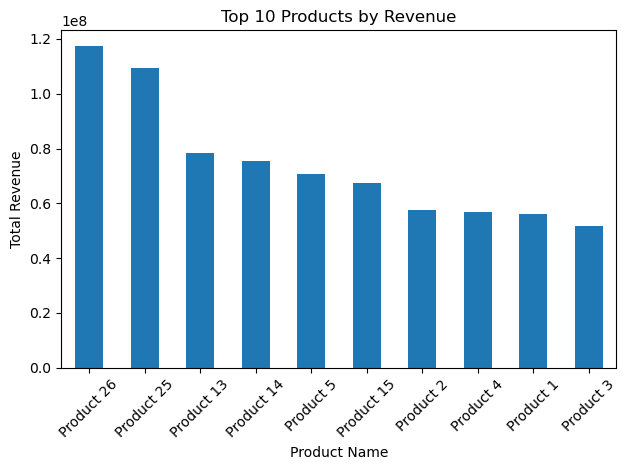

In [34]:
# Which product generated the highest revenue overall?

top_products = df.groupby('product_name')['revenue'].sum().sort_values(ascending=False).head(10)

# Plot
top_products.plot(kind='bar')
plt.xlabel('Product Name')
plt.ylabel('Total Revenue')
plt.title('Top 10 Products by Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#The chart visualizes the top 10 products based on their total revenue.

 Data was grouped by product_name and revenue was summed for each product.

Product 26 and Product 25 generated the highest revenue  .

Each bar's height represents the total revenue for that product.

The x-axis shows product names, and the y-axis shows total revenue in numeric format.

The chart helps in identifying the best-performing products in terms of sales.



1. Yearly Sales Trend Over Time
Goal: Track revenue trends over time to detect seasonality or sales spikes

Chart: Line chart

EDA Type: Temporal (time series)

Structure: Line with markers to highlight monthly revenue points clearly

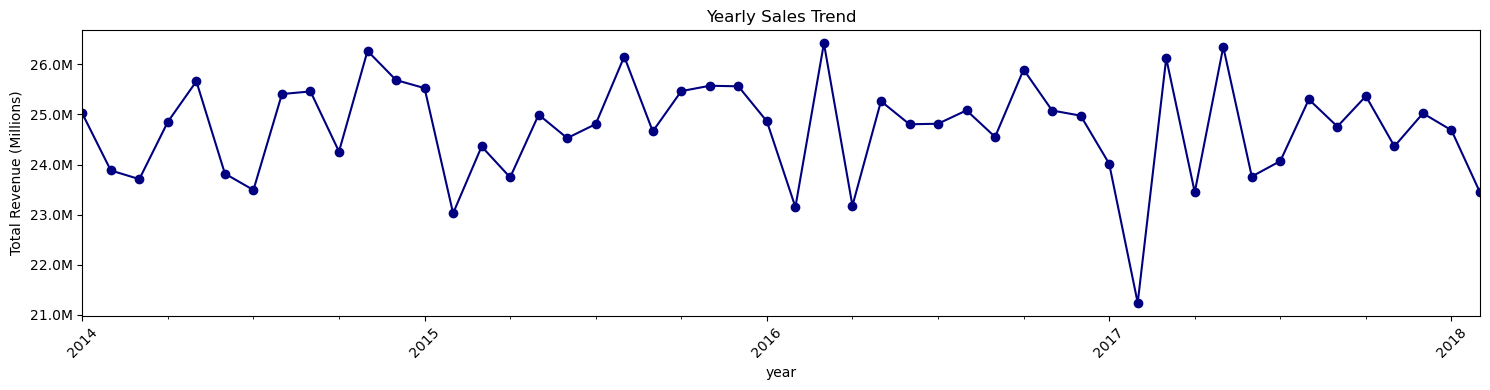

In [56]:
# Convert order_date to monthly period (e.g., 2022-01, 2022-02)
df['order_month'] = df['order_date'].dt.to_period('M')

# Calculate total revenue for each month
monthly_sales = df.groupby('order_month')['revenue'].sum()

# Set figure size for clarity
plt.figure(figsize=(15,4))

# Plot the monthly sales trend with circle markers and navy line
monthly_sales.plot(marker='o', color='navy')

# Scale y-axis values to millions for readability
from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

# Add title and axis labels
plt.title('Yearly Sales Trend')
plt.xlabel('year')
plt.ylabel('Total Revenue (Millions)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent clipping
plt.tight_layout()
plt.show()

The revenue changes every month but stays mostly between 21M to 26M.

Some months show low sales, like in early 2015, mid-2016, and early 2017.

The highest sales were seen in early 2016 and mid-2017.

Overall, sales are stable, but there are ups and downs at certain times.

✅ Recommendation
Try to find out why sales drop in certain months. You can:

Run promotions during low-sales months.

Focus marketing efforts in those periods to increase revenue.



In [36]:
#How does revenue vary across different sales channels (Wholesale, Export, Distributor)? 

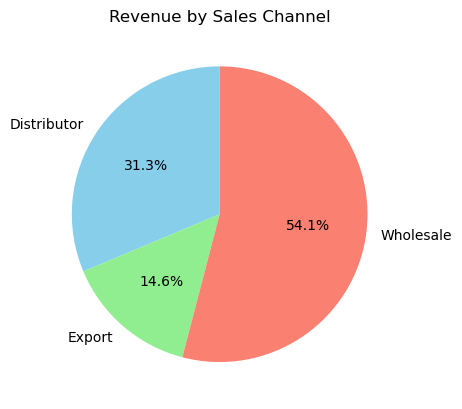

In [37]:
revenue_by_channel = df.groupby('channel')['revenue'].sum()

# Plot pie chart
revenue_by_channel.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue', 'lightgreen', 'salmon'],
    title='Revenue by Sales Channel'
)

plt.ylabel('')  # Hide y-axis label
plt.show()

#Wholesale contributes the highest revenue among all sales channels.

Distributor is the second-highest contributor to total revenue.

Export generates the least revenue compared to the other two channels.

The business relies heavily on the wholesale channel for income.

 4. Top 10 Products by Avg Profit Margin
Goal: Compare average profitability across products to identify high-margin items

Chart: Horizontal bar chart

EDA Type: Univariate

Structure: Bars sorted descending to show top 10 products with average profit margin values

C:\Users\Ibrah\AppData\Local\Temp\ipykernel_19536\1714083238.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


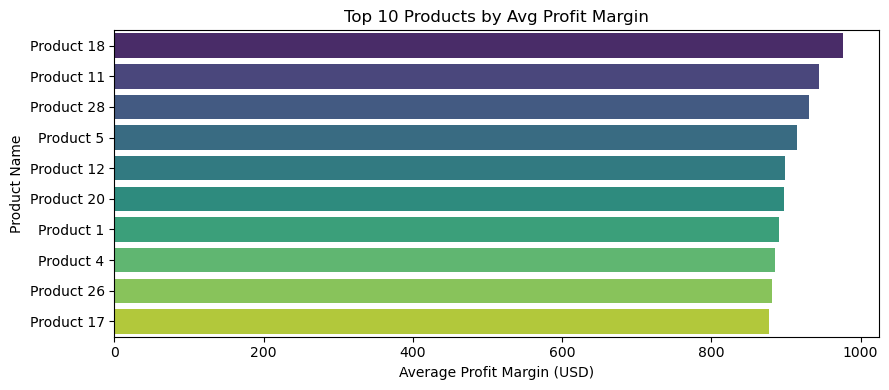

In [49]:
# 1️⃣ Compute average profit per product and take the top 10
top_margin = (
    df.groupby('product_name')['profit']
      .mean()                        # Calculate mean profit for each product
      .sort_values(ascending=False)  # Sort from highest to lowest average profit
      .head(10)                      # Keep only the top 10 products
)

# 2️⃣ Set the figure size for clarity
plt.figure(figsize=(9, 4))

# 3️⃣ Plot a horizontal bar chart
sns.barplot(
    x=top_margin.values,    # X-axis: average profit values
    y=top_margin.index,     # Y-axis: product names
    palette='viridis'       # Color palette for the bars
)

# 4️⃣ Add title and axis labels
plt.title('Top 10 Products by Avg Profit Margin')  # Chart title
plt.xlabel('Average Profit Margin (USD)')          # X-axis label
plt.ylabel('Product Name')                         # Y-axis label

# 5️⃣ Adjust layout to prevent clipping and show the plot
plt.tight_layout()
plt.show()

INSIGHTS

Product 18 is the most profitable (~1000 USD), far outperforming others.

High-margin products (e.g., Product 11, 28) range between ~600–800 USD, while the lowest (Product 17) is ~200 USD.

RECOMMENDATION:

Focus on scaling top performers (Product 18, 11, 28).

Optimize costs/pricing for lower-tier top products (e.g., Product 17, 26).



**Total Sales by US Region**
Goal: Compare total sales across U.S. regions to identify top‑performing markets and areas for targeted growth.

Chart: Horizontal bar chart

EDA Type: Univariate comparison

Structure:

Bars sorted ascending (Northeast → West) for clear bottom‑to‑top ranking
X‑axis in millions USD, Y‑axis listing regions

C:\Users\Ibrah\AppData\Local\Temp\ipykernel_19536\639306006.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


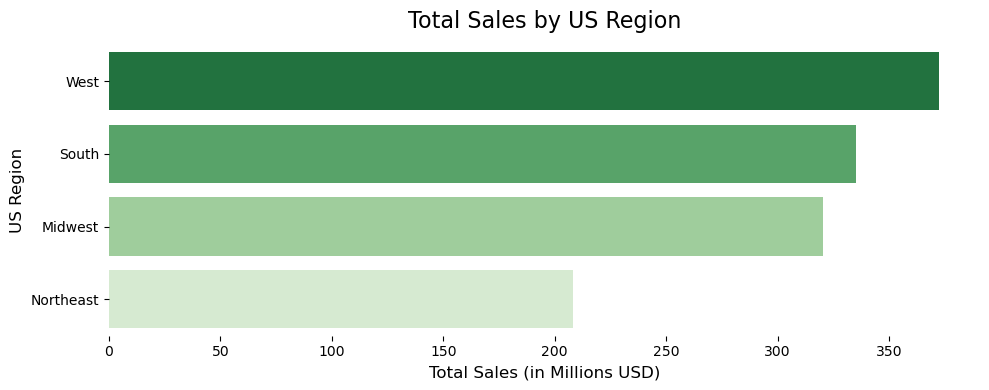

In [50]:
# 1. Aggregate total sales by region (in millions)
region_sales = (
    df
    .groupby('us_region')['revenue']
    .sum()
    .sort_values(ascending=False)  # so bars go top→bottom
    / 1e6                         # convert to millions
)

# 2. Plot
plt.figure(figsize=(10, 4))
sns.barplot(
    x=region_sales.values,
    y=region_sales.index,
    palette='Greens_r'          # dark→light green
)

# 3. Formatting
plt.title('Total Sales by US Region', fontsize=16, pad=12)
plt.xlabel('Total Sales (in Millions USD)', fontsize=12)
plt.ylabel('US Region', fontsize=12)
plt.xticks(rotation=0)
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()


INSIGHTS —  
 West dominates with roughly \$360 M in sales (~35 % of total), underscoring its market leadership.  
 
South & Midwest each contribute over \$320 M (~32 %), indicating strong, consistent demand across central regions.

Northeast trails at about \$210 M (~20 %), signaling room for growth and targeted investment.  

Action: Focus on closing the Northeast gap with local promotions and strategic partnerships, while maintaining national playbook success.  


C:\Users\Ibrah\AppData\Local\Temp\ipykernel_19536\1452768722.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Ibrah\AppData\Local\Temp\ipykernel_19536\1452768722.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


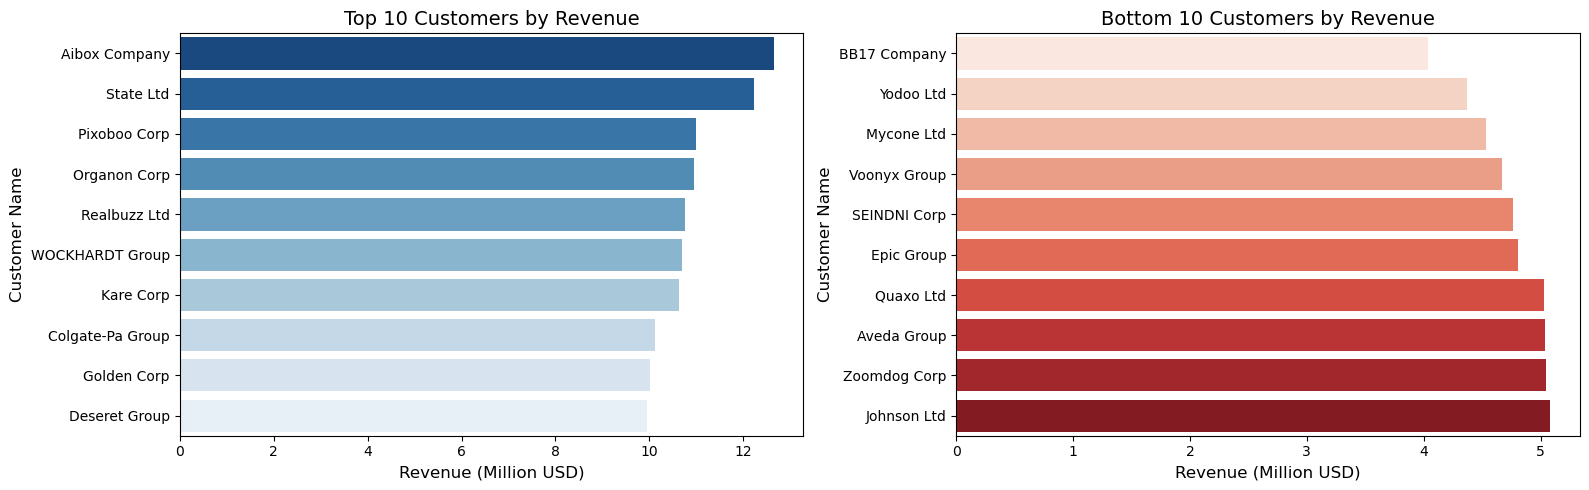

In [51]:
# 🔝 Calculate total revenue per customer and select top 10
top_rev = (
    df.groupby('customer_name')['revenue']
      .sum()                        # Sum revenue for each customer
      .sort_values(ascending=False) # Sort from highest to lowest
      .head(10)                     # Keep top 10 customers
)

# 🔻 Calculate total revenue per customer and select bottom 10
bottom_rev = (
    df.groupby('customer_name')['revenue']
      .sum()                        # Sum revenue for each customer
      .sort_values(ascending=True)  # Sort from lowest to highest
      .head(10)                     # Keep bottom 10 customers
)

# Create a figure with two side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Plot 1: Top 10 customers by revenue (converted to millions)
sns.barplot(
    x=top_rev.values / 1e6,    # X-axis: revenue in millions
    y=top_rev.index,           # Y-axis: customer names
    palette='Blues_r',         # Color palette (reversed blues)
    ax=axes[0]                 # Draw on the left subplot
)
axes[0].set_title('Top 10 Customers by Revenue', fontsize=14)         # Title
axes[0].set_xlabel('Revenue (Million USD)', fontsize=12)              # X-axis label
axes[0].set_ylabel('Customer Name', fontsize=12)                      # Y-axis label

# Plot 2: Bottom 10 customers by revenue (converted to millions)
sns.barplot(
    x=bottom_rev.values / 1e6, # X-axis: revenue in millions
    y=bottom_rev.index,        # Y-axis: customer names
    palette='Reds',            # Color palette (reds)
    ax=axes[1]                 # Draw on the right subplot
)
axes[1].set_title('Bottom 10 Customers by Revenue', fontsize=14)      # Title
axes[1].set_xlabel('Revenue (Million USD)', fontsize=12)              # X-axis label
axes[1].set_ylabel('Customer Name', fontsize=12)                      # Y-axis label

# Adjust layout to prevent overlap and display both charts
plt.tight_layout()
plt.show()

### INSIGHTS ---
- Aibox Company tops the list with \$12.5 M, followed closely by State Ltd (\$12.2 M), while the 10th-ranked Deseret Group still contributes \$9.9 M—demonstrating a tight \$10–12 M top tier.

- At the bottom, Johnson Ltd leads its group with \$5.1 M, down to BB17 Company at \$4.1 M—roughly half the top customer’s revenue.

- This steep drop from ~\$10 M+ to \$4–5 M highlights high revenue concentration among the top customers.

- Action: prioritize retention and upsell for your top ten, and launch targeted growth campaigns to elevate the lower-revenue cohort.


C:\Users\Ibrah\AppData\Local\Temp\ipykernel_19536\3126535350.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


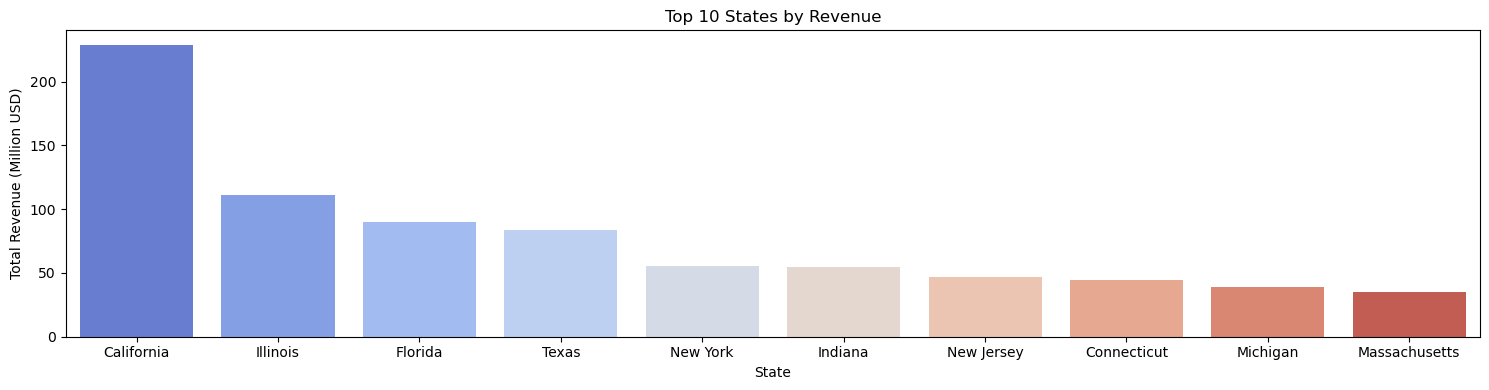

C:\Users\Ibrah\AppData\Local\Temp\ipykernel_19536\3126535350.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


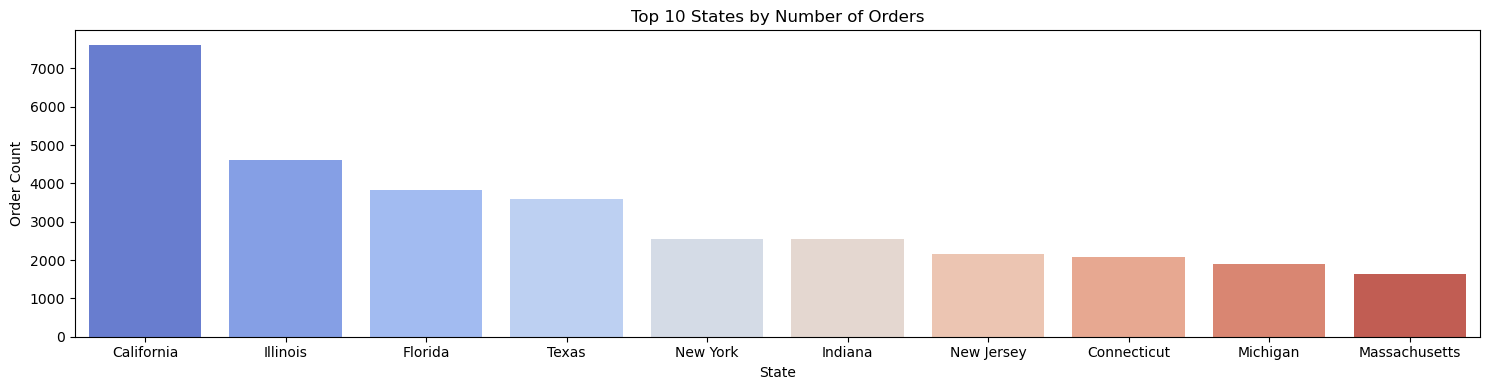

In [52]:
# Aggregate total revenue and unique order count per state
state_rev = df.groupby('state_name').agg(
    revenue=('revenue', 'sum'),          # Sum up revenue per state
    orders=('order_number', 'nunique')   # Count unique orders per state
).sort_values('revenue', ascending=False).head(10)  # Keep top 10 by revenue

# Plot 1: Top 10 states by revenue (scaled to millions)
plt.figure(figsize=(15, 4))
sns.barplot(
    x=state_rev.index,                   # X-axis: state names
    y=state_rev['revenue'] / 1e6,        # Y-axis: revenue in millions
    palette='coolwarm'                   # Color palette
)
plt.title('Top 10 States by Revenue')     # Chart title
plt.xlabel('State')                       # X-axis label
plt.ylabel('Total Revenue (Million USD)') # Y-axis label
plt.tight_layout()                        # Adjust layout
plt.show()                                # Display the plot

# Plot 2: Top 10 states by number of orders
plt.figure(figsize=(15, 4))
sns.barplot(
    x=state_rev.index,                   # X-axis: state names
    y=state_rev['orders'],               # Y-axis: order counts
    palette='coolwarm'                   # Color palette
)
plt.title('Top 10 States by Number of Orders')  # Chart title
plt.xlabel('State')                              # X-axis label
plt.ylabel('Order Count')                        # Y-axis label
plt.tight_layout()                               # Adjust layout
plt.show()              

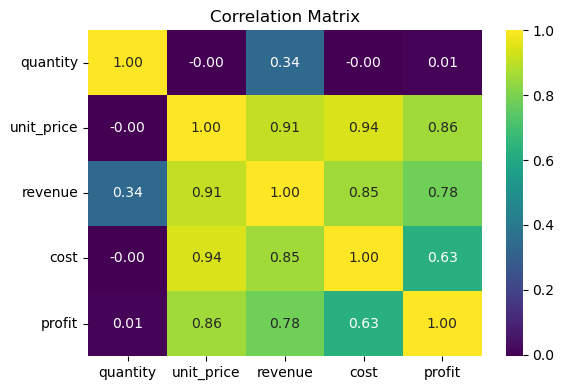

In [54]:
# List numeric columns to include in the correlation calculation
num_cols = ['quantity', 'unit_price', 'revenue', 'cost', 'profit']

# Calculate the correlation matrix for these numeric features
corr = df[num_cols].corr()

# Set the figure size for clarity
plt.figure(figsize=(6,4))

# Plot the heatmap with annotations and a viridis colormap
sns.heatmap(
    corr,           # Data: correlation matrix
    annot=True,     # Display the correlation coefficients on the heatmap
    fmt=".2f",      # Format numbers to two decimal places
    cmap='viridis'  # Color palette for the heatmap
)

# Add title for context
plt.title('Correlation Matrix')

# Adjust layout to prevent clipping
plt.tight_layout()

# Display the heatmap
plt.show()

### INSIGHTS ---
- **Profit and revenue** are very strongly correlated (0.87), indicating that as sales value increases, profit tends to rise as well.  
- **Unit price** is a key driver: it correlates 0.91 with revenue, 0.79 with profit, and 0.94 with cost—highlighting how pricing decisions ripple through both top‑line and expense figures.  
- **Cost** shows a strong link to revenue (0.85) but a more moderate tie to profit (0.58), underscoring that while higher sales often bring higher expenses, margins can still vary.  
- **Quantity** has virtually no correlation with unit price or cost (≈0.00) and only modest associations with revenue (0.34) and profit (0.30), making volume a secondary factor compared to pricing.  

# 🔍 **Key Insights**  

Yearly Revenue Cycle:
Revenue stays stable between ≈
26.5M across 2014–2017, with no consistent seasonal spikes. Sharpest drop (≈$21.2M) occurs in early 2017, indicating a possible one-time disruption.

Channel Mix:
Wholesale: 54%. Distributors: 31%. Exports: 15% — opportunity to scale international presence.

Top Products (Revenue):
Product 26: 
110M; Product 13: 
68–75M; bottom performers: $52–57M.

Profit Margins:
Profit margins range broadly from ≈18% to ≈60%, with no strong correlation to unit price. Dense horizontal bands suggest standardized pricing strategies across tiers.

Seasonal Volume:
No strong monthly pattern, but slight volume uptick appears around May–June. Early 2017 dip (≈$21.2M) may require investigation.

Regional Performance:
California leads: ≈230M Revenue & 7500+ orders. Illinois/Florida/Texas: ≈
85M–110M & ≈3500–4500 orders. NY/Indiana: ≈
54M & 2000+ orders.  